# Sales Data Analysis

# 1.0 Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# 2.0 Load Dataset

In [2]:
df = pd.read_excel("../Data/Sales.xlsx",sheet_name='Orders')

# 3.0 Data Composition

## 3.1 Information from the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Delivery Duration  9994 non-null   int64         
 5   Ship Mode          9994 non-null   object        
 6   Customer ID        9994 non-null   object        
 7   Customer Name      9994 non-null   object        
 8   Segment            9994 non-null   object        
 9   Country            9994 non-null   object        
 10  City               9994 non-null   object        
 11  State              9994 non-null   object        
 12  Postal Code        9994 non-null   int64         
 13  Region             9994 non-null   object        
 14  Product 

## 3.2 Get the peak of the data

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.000000,41.9136,-220.046400
1,2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.000000,219.5820,-512.358000
2,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.000000,6.8714,-7.748600
3,4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-430.909875,-383.0310,-909.698625
4,5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,-4.473600,2.5164,-15.378000


Row ID column is useless here, lets remove this column

In [5]:
df = df.drop(columns = ["Row ID"])

Postal Code is integer, now we convert in to string

In [6]:
df['Postal Code'] = df['Postal Code'].astype('str')

In [7]:
print(df['Postal Code'].dtype)

object


# 3.3 Check missing values

In [8]:
df.isnull().sum()

Order ID             0
Order Date           0
Ship Date            0
Delivery Duration    0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Discount Value       0
Profit               0
COGS                 0
dtype: int64

<Axes: >

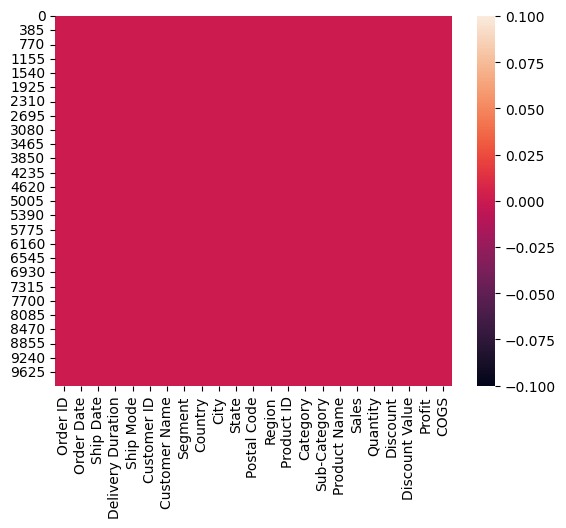

In [9]:
sns.heatmap(df.isnull())

The above chart shows that there is no missing values in the data

# 4.0 Data Distribution

## 4.1 Summary Statistics

In [10]:
df.describe()

,Order Date,Ship Date,Delivery Duration,Sales,Quantity,Discount,Discount Value,Profit,COGS
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,3.958175,229.858001,3.789574,0.156203,-32.277580,28.656896,-168.923525
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.000000,0.444000,1.000000,0.000000,-11319.240000,-6599.978000,-13130.318400
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,3.000000,17.280000,2.000000,0.000000,-14.870400,1.728750,-155.028600
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,4.000000,54.490000,3.000000,0.200000,-1.036800,8.666500,-35.693200
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,5.000000,209.940000,5.000000,0.200000,0.000000,29.364000,-10.574300
max,2017-12-30 00:00:00,2018-01-05 00:00:00,7.000000,22638.480000,14.000000,0.800000,0.000000,8399.976000,-0.554400
std,NaN,NaN,1.747567,623.245101,2.225110,0.206452,164.025577,234.260108,430.869751


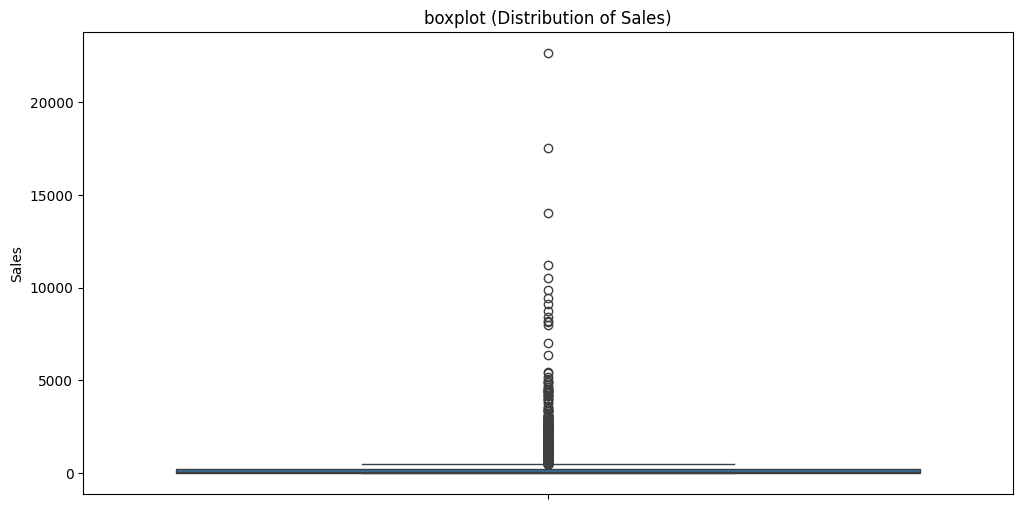

In [11]:
plt.figure(figsize=(12,6))
plt.title('boxplot (Distribution of Sales)')
sns.boxplot(df, y='Sales')
plt.show()

In [12]:
df.head()

,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.000000,41.9136,-220.046400
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.000000,219.5820,-512.358000
2,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.000000,6.8714,-7.748600
3,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-430.909875,-383.0310,-909.698625
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,-4.473600,2.5164,-15.378000


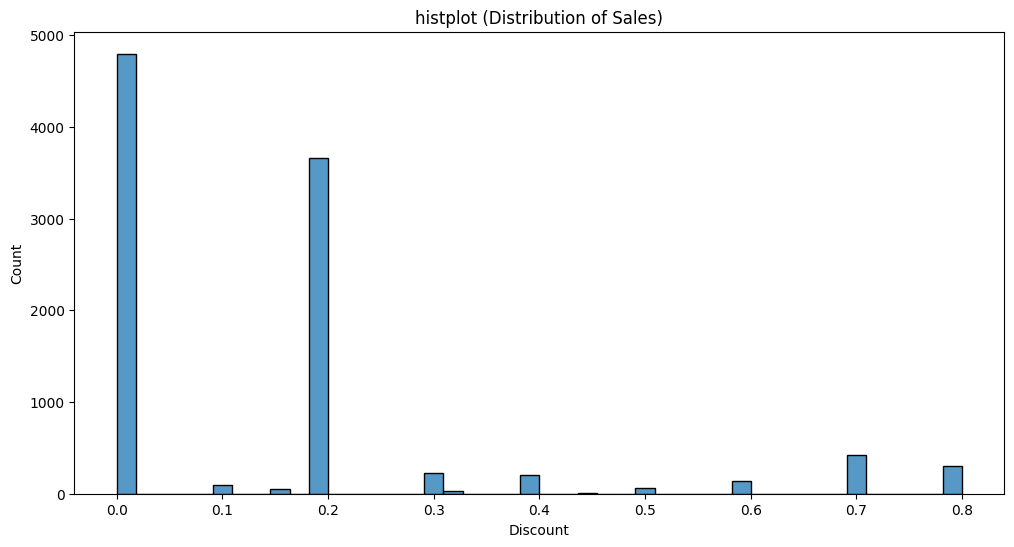

In [13]:
plt.figure(figsize=(12,6))
plt.title('histplot (Distribution of Sales)')
sns.histplot(df, x='Discount')
plt.show()

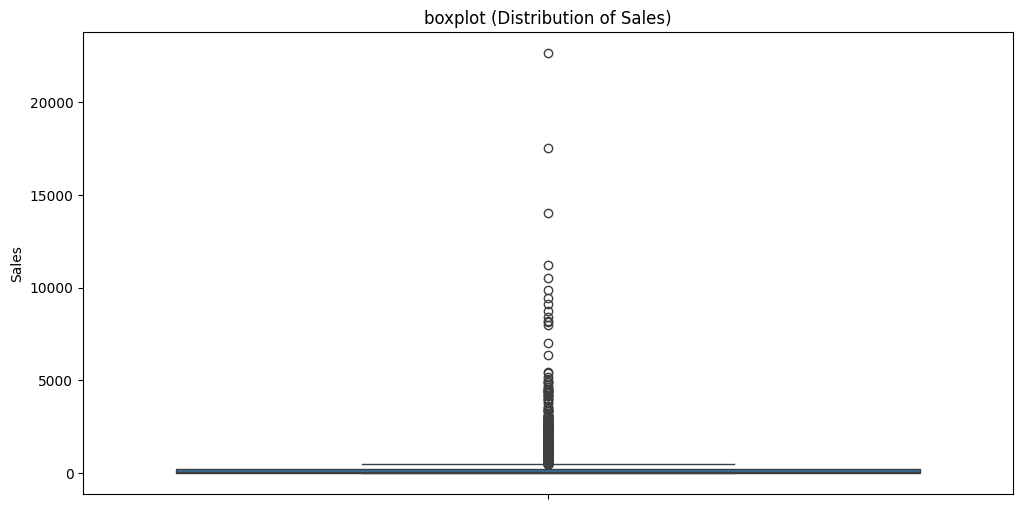

In [14]:
plt.figure(figsize=(12,6))
plt.title('boxplot (Distribution of Sales)')
sns.boxplot(df, y='Sales')
plt.show()

# Log transformation

In [15]:
df['Sales_log'] = np.log1p(df['Sales'])
print(df['Sales'].head())
df['Sales_log'].head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64


0    5.572002
1    6.597064
2    2.748552
3    6.865450
4    3.151368
Name: Sales_log, dtype: float64

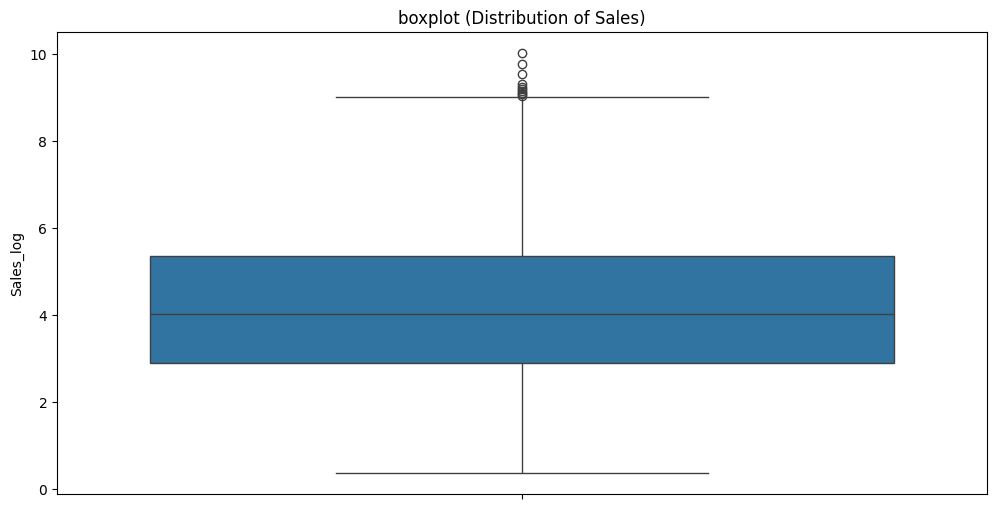

In [16]:
plt.figure(figsize=(12,6))
plt.title('boxplot (Distribution of Sales)')
sns.boxplot(df, y='Sales_log')
plt.show()

In [17]:
df.head()

,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS,Sales_log
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.000000,41.9136,-220.046400,5.572002
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.000000,219.5820,-512.358000,6.597064
2,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.000000,6.8714,-7.748600,2.748552
3,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-430.909875,-383.0310,-909.698625,6.865450
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,-4.473600,2.5164,-15.378000,3.151368


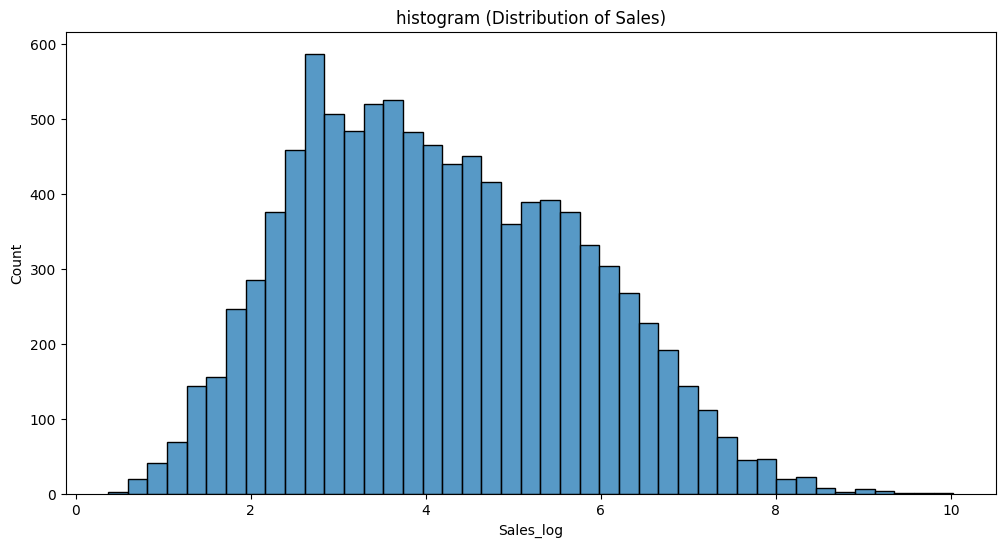

In [18]:
plt.figure(figsize=(12,6))
plt.title('histogram (Distribution of Sales)')
sns.histplot(df, x='Sales_log')
plt.show()

The majority of our sales transactions falls under the middle of the sales range

In [19]:
df.head()

,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS,Sales_log
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.000000,41.9136,-220.046400,5.572002
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.000000,219.5820,-512.358000,6.597064
2,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.000000,6.8714,-7.748600,2.748552
3,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-430.909875,-383.0310,-909.698625,6.865450
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,-4.473600,2.5164,-15.378000,3.151368


# Heatmap

<Axes: >

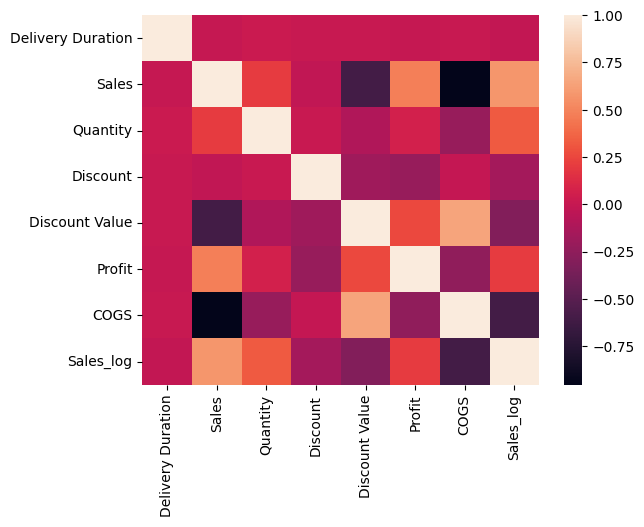

In [20]:
df_num = df.select_dtypes(['int','float'])
heat_map = df_num.corr()
sns.heatmap(heat_map)

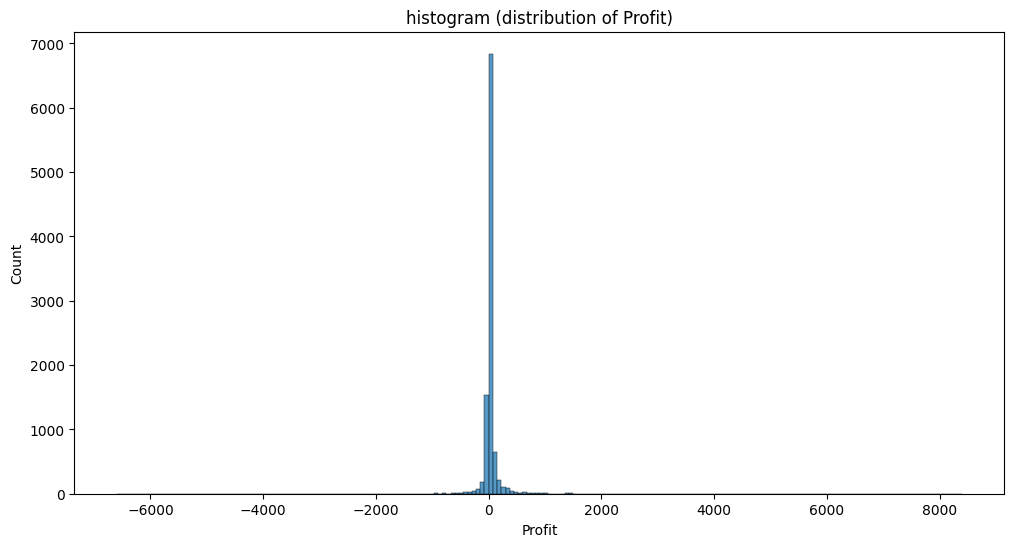

In [21]:
plt.figure(figsize=(12,6))
plt.title('histogram (distribution of Profit)')
sns.histplot(df, x='Profit')
plt.show()

In [22]:
df['Profit_log'] = np.log1p(df['Profit'])

c:\Users\HP\miniconda3\envs\python_eda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


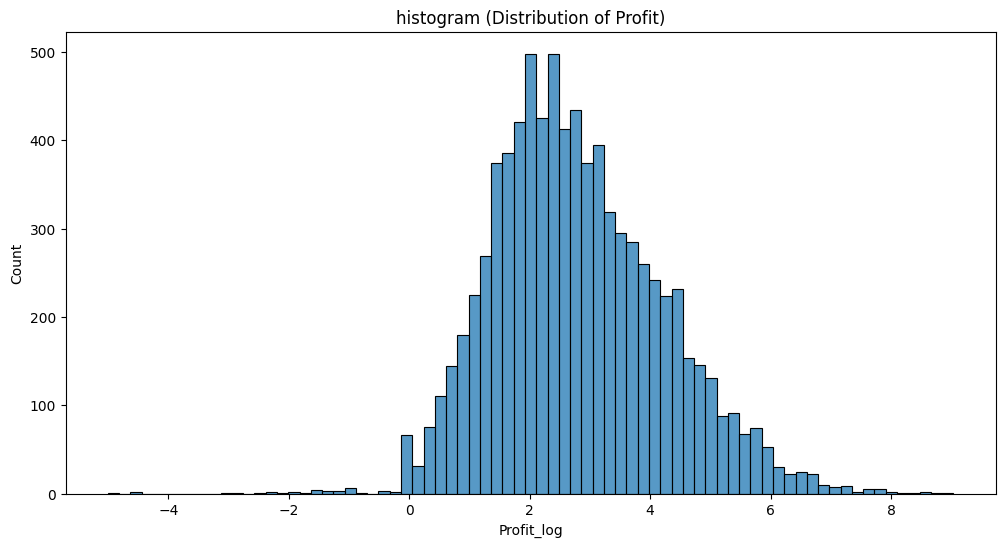

In [23]:
plt.figure(figsize=(12,6))
plt.title('histogram (Distribution of Profit)')
sns.histplot(df, x='Profit_log')
plt.show()

1. The histogram clearly shows that most of the sales are profitable as it showing the data above zero
2. The slightly bell shaped curve is showing on the positive x-axis with fewer high or low outliers

# 5.0 Data Comparision

In [24]:
big_losses = df[(df['Sales'] > 10000) & (df['Profit'] < 0)]
big_losses

,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS,Sales_log,Profit_log
2697,CA-2014-145317,2014-03-18,2014-03-23,5,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-11319.24,-1811.0784,-13130.3184,10.027451,NaN


In [25]:
customer_sales = df[df['Customer Name'] == 'Sean Miller']
print(customer_sales[['Sales', 'Discount', 'Profit','COGS']])

          Sales  Discount     Profit        COGS
2266      7.968       0.2     2.6892     -3.6852
2573    526.450       0.0    31.5870   -494.8630
2696    821.300       0.5   -16.4260   -427.0760
2697  22638.480       0.5 -1811.0784 -13130.3184
2698     21.376       0.2     7.4816     -9.6192
2699      8.016       0.2     1.0020     -5.4108
2700     30.768       0.2     8.0766    -16.5378
2701     18.936       0.2     5.9175     -9.2313
2702    122.352       0.2    15.2940    -82.5876
7853      9.960       0.0     4.8804     -5.0796
9187      3.488       0.2    -0.6976     -3.4880
9188     21.728       0.2     3.8024    -13.5800
9189    663.072       0.2  -165.7680   -696.2256
9190     99.588       0.7   -82.9900   -112.8664
9191     49.568       0.2    15.4900    -24.1644


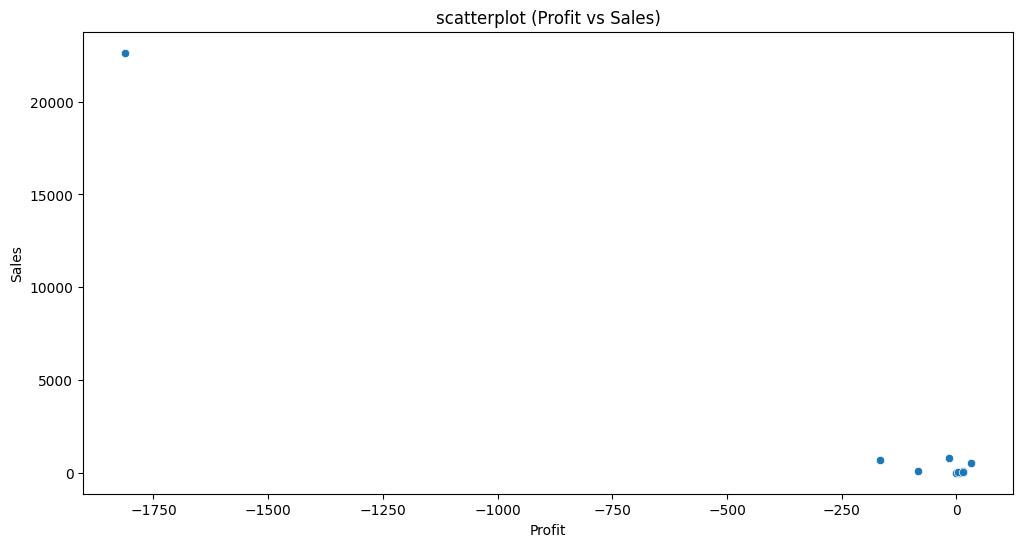

In [26]:
plt.figure(figsize=(12,6))
plt.title('scatterplot (Profit vs Sales)')
sns.scatterplot(df[df['Customer Name'] == 'Sean Miller'], x='Profit',y='Sales')
plt.show()

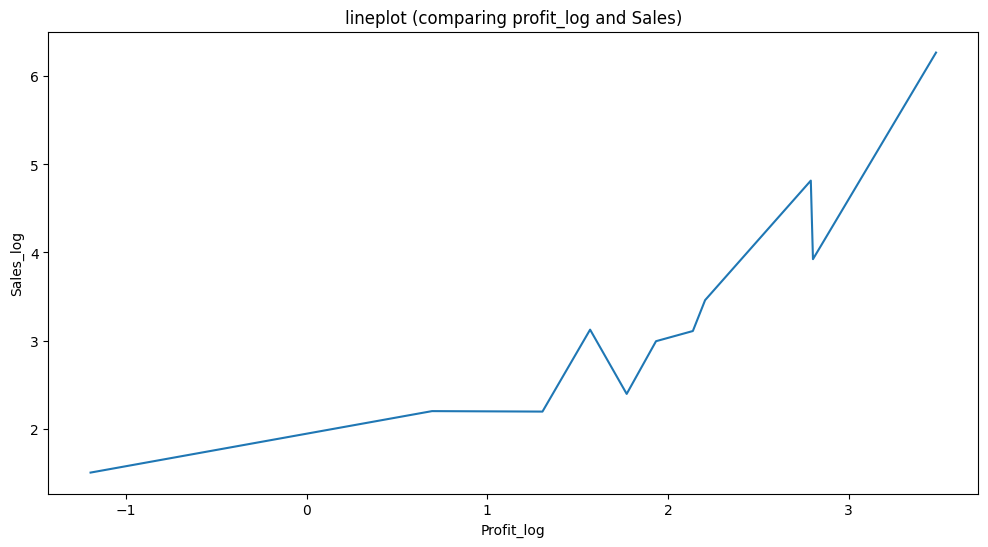

In [27]:
plt.figure(figsize=(12,6))
plt.title('lineplot (comparing profit_log and Sales)')
sns.lineplot(df[df['Customer Name'] == 'Sean Miller'], x='Profit_log',y='Sales_log')
plt.show()

The above both figures shows that the Customer Sean Miller does not have much transaction but his sales are not beneficial infact it contains a transcation of more than 20,000 sales with big loss

In [28]:
cisco_sales = df[df['Product Name'].str.contains('Cisco TelePresence System EX90 Videoconferenci...')]
cisco_sales


,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS,Sales_log,Profit_log
2697,CA-2014-145317,2014-03-18,2014-03-23,5,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-11319.24,-1811.0784,-13130.3184,10.027451,NaN


It shows that the Cisco TelePresence System EX90 Videoconferenci...	is the product sales only one time in the data with the big financial loss

In [29]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [30]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

1. Which city contains the highest no.of sales

In [31]:
max_sales = df.groupby('City')['Sales'].count().sort_values(ascending=False).head(10).reset_index()
max_sales

,City,Sales
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
5,Houston,377
6,Chicago,314
7,Columbus,222
8,San Diego,170
9,Springfield,163


Barplot

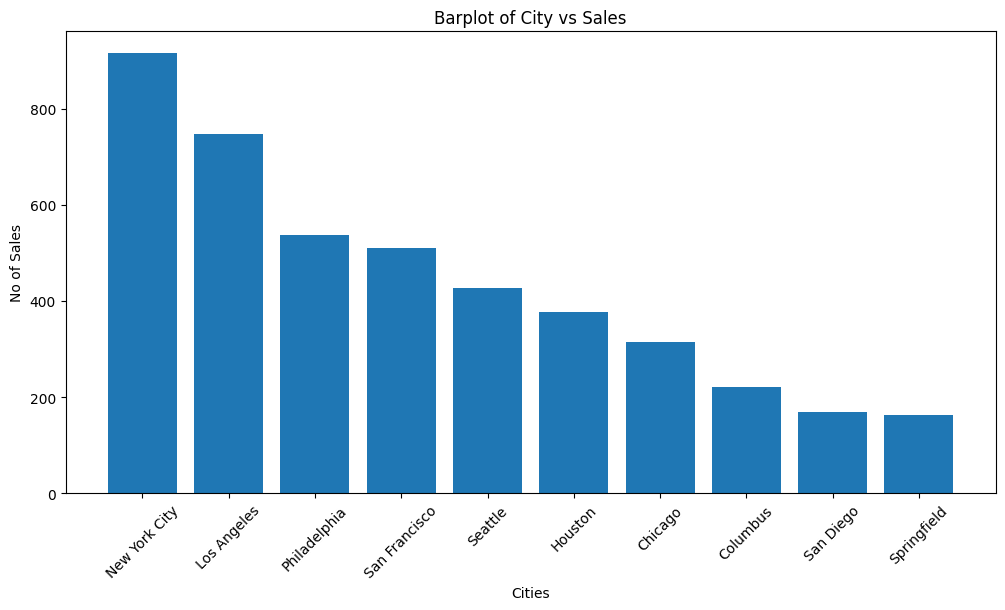

In [32]:
plt.figure(figsize=(12,6))
plt.bar(x = max_sales['City'],height = max_sales['Sales'])
plt.title("Barplot of City vs Sales")
plt.xlabel('Cities')
plt.ylabel('No of Sales')
plt.xticks(rotation=45)
plt.show()

From above figure we found that the New York , Los Angeles , philadephia has more no of sales

2. which product has more sales in the new york city

In [33]:
newyork_sales = df[df['City']=="New York City"].groupby('Product Name')['Sales'].sum().sort_values(ascending = False).reset_index().head(10)
newyork_sales

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,11199.968
1,HP Designjet T520 Inkjet Large Format Printer ...,6999.960
2,Zebra ZM400 Thermal Label Printer,6965.700
3,"3D Systems Cube Printer, 2nd Generation, Magenta",5199.960
4,GBC DocuBind P400 Electric Binding System,4355.168
5,GBC DocuBind TL300 Electric Binding System,4305.552
6,"Riverside Palais Royal Lawyers Bookcase, Royal...",4228.704
7,Bady BDG101FRU Card Printer,3999.950
8,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980
9,HON 5400 Series Task Chairs for Big and Tall,3785.292


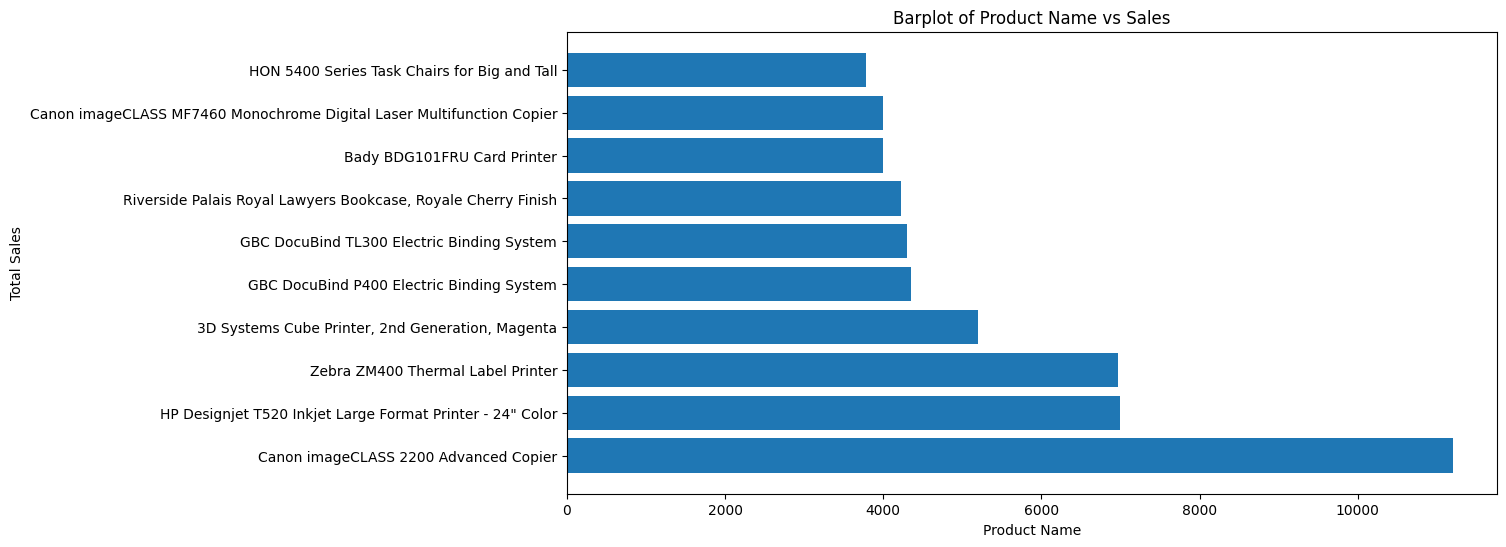

In [34]:
plt.figure(figsize=(12,6))
plt.barh(y = newyork_sales['Product Name'],width = newyork_sales['Sales'])
plt.title("Barplot of Product Name vs Sales")
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

From above figure we find out that Canon imageCLASS 2200 Advanced Copier has the most no of sales in the top notch city newyork with 11199.968 total sales this indicate this product is in demand in that city

3. Which Product has more sales profit in the newyork city

In [35]:
newyork_profit = df[df['City']=="New York City"].groupby('Product Name')['Profit'].sum().sort_values(ascending = False).reset_index().head(10)
newyork_profit

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,3919.9888
1,Zebra ZM400 Thermal Label Printer,3343.5360
2,HP Designjet T520 Inkjet Large Format Printer ...,2239.9872
3,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.9900
4,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.2050
5,GBC DocuBind TL300 Electric Binding System,1453.1238
6,GBC DocuBind P400 Electric Binding System,1415.4296
7,Ativa V4110MDD Micro-Cut Shredder,1371.9804
8,"3D Systems Cube Printer, 2nd Generation, Magenta",1351.9896
9,Bady BDG101FRU Card Printer,1159.9855


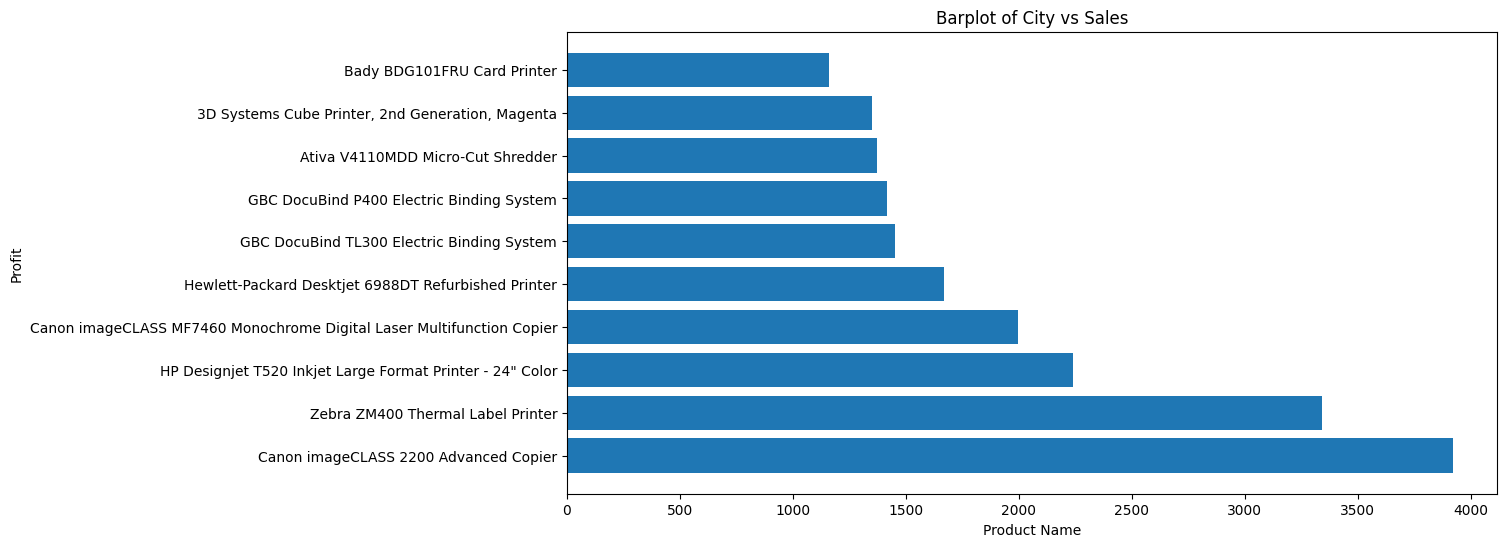

In [36]:
plt.figure(figsize=(12,6))
plt.barh(y = newyork_profit['Product Name'],width = newyork_profit['Profit'])
plt.title("Barplot of City vs Sales")
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.show()

Canon imageCLASS 2200 Advanced Copier has more profit in the city with 3919.9888 total profit this indicates that the newyouk city contains the product with the maximum sales as well as maximum profit which means if we sale this product in the newyork city will be very profitable 

In [37]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Delivery Duration', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Discount Value',
       'Profit', 'COGS', 'Sales_log', 'Profit_log'],
      dtype='object')

4. Discount strategy for top performing product in newyork

In [38]:
newyork_profit = df[(df['City']=="New York City") & (df['Product Name']== 'Canon imageCLASS 2200 Advanced Copier')][['Product Name','Discount']]
newyork_profit

,Product Name,Discount
2623,Canon imageCLASS 2200 Advanced Copier,0.2


Canon imageCLASS 2200 Advanced Copier is one of the top performing product across newyork is sold in relatively low discount of 20% or less which indicates that product with strong market demands having less reliance on discount which results in more profitabe sales

5. Which segment generates the most sales in New York City

In [39]:
Product_segmetent_sales = df[(df['City']== 'New York City') & (df['Product Name'] == 'Canon imageCLASS 2200 Advanced Copier')].groupby('Segment')['Sales'].sum().sort_values(ascending = False).reset_index()
Product_segmetent_sales

,Segment,Sales
0,Home Office,11199.968


we observe that the only Home Office Segment in which the Product Canon imageCLASS 2200 Advanced Copier	is sold which means in the newyork city most of the employees working on home or works on small businesses bug that product lets analyze other segment maximum sales products

6. which segment has the highest sales

In [40]:
city_segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).reset_index().head()
city_segment_sales

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


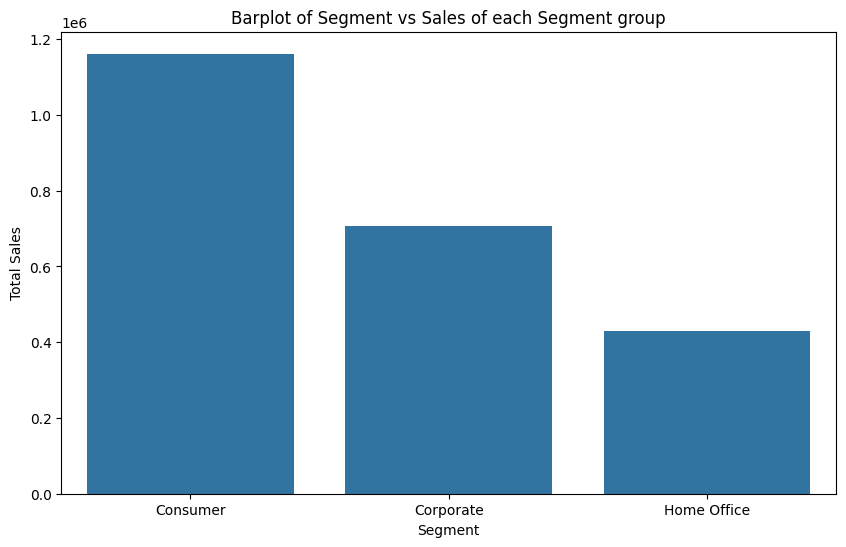

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=city_segment_sales,x='Segment',y='Sales')
plt.title("Barplot of Segment vs Sales of each Segment group") 
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.savefig('barplot_segment_and_sales.png', dpi=300, bbox_inches='tight')
plt.show()

From above figure we observe that Segment consumers have more more no of sales

7. Top 10 Cities with the highest product sales

In [42]:
city_product_sales = df.groupby(['City','Product Name'])['Sales'].sum().sort_values(ascending = False).head(10).reset_index()
city_product_sales

,City,Product Name,Sales
0,Jacksonville,Cisco TelePresence System EX90 Videoconferenci...,22638.480
1,Lafayette,Canon imageCLASS 2200 Advanced Copier,17499.950
2,Seattle,Canon imageCLASS 2200 Advanced Copier,13999.960
3,San Francisco,High Speed Automatic Electric Letter Opener,13100.240
4,New York City,Canon imageCLASS 2200 Advanced Copier,11199.968
5,Newark,Canon imageCLASS 2200 Advanced Copier,10499.970
6,Detroit,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
7,Minneapolis,Ibico EPK-21 Electric Binding System,9449.950
8,Lakewood,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
9,Arlington,HP Designjet T520 Inkjet Large Format Printer ...,8749.950


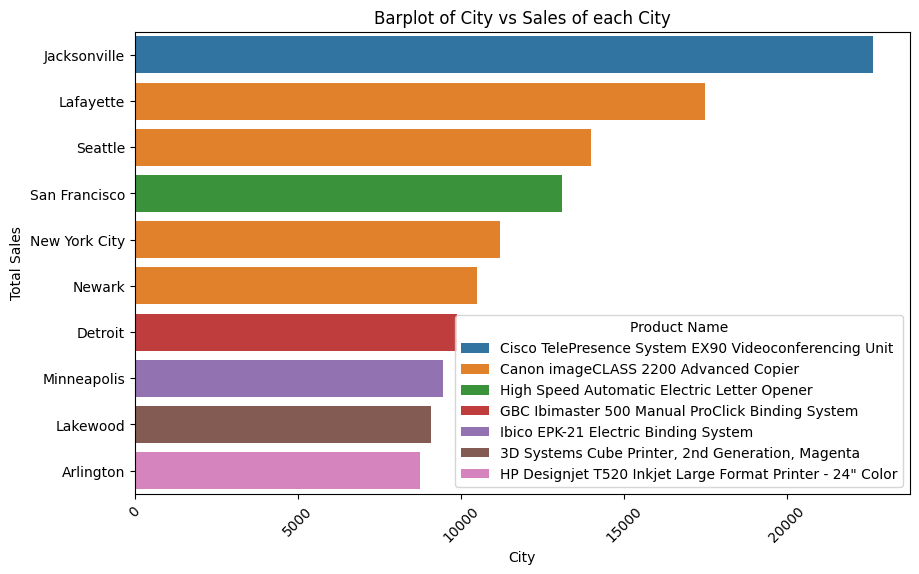

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=city_product_sales,y='City',x='Sales',hue='Product Name')
plt.title("Barplot of City vs Sales of each City") 
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('barplot_city_and_sales.png', dpi=300, bbox_inches='tight')
plt.show()

The above figure shows that the `'Jacksonville'` contains the product `'Cisco TelePresence System EX90 Videoconferenci...'` with the top notch sale of 22638.480

8. Which Product has a highest over all sales 

In [44]:
product_sales = df.groupby(['Product Name'])['Sales'].sum().sort_values(ascending = False).head(10).reset_index()
product_sales

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


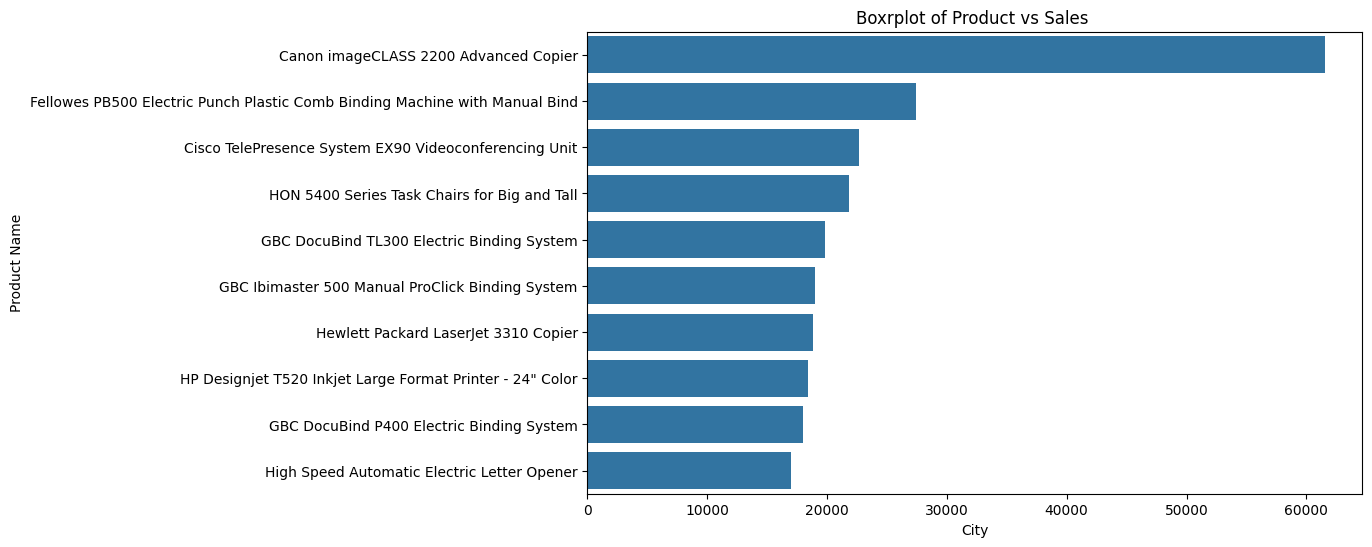

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=product_sales,y='Product Name',x='Sales')
plt.title("Boxrplot of Product vs Sales ") 
plt.xlabel('City')
plt.ylabel('Product Name')
plt.savefig('barplot_product_and_sales.png', dpi=300, bbox_inches='tight')
plt.show()

The figure shows that `'the Canon imageCLASS 2200 Advanced Copier'` has the maximum sales then any of the other product

9. Total Sales of "Canon imageCLASS 2200 Advanced Copier"

In [46]:
city_sales = df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby(['City'])['Sales'].sum().sort_values(ascending = False).head(10).reset_index()
city_sales

,City,Sales
0,Lafayette,17499.950
1,Seattle,13999.960
2,New York City,11199.968
3,Newark,10499.970
4,Philadelphia,8399.976


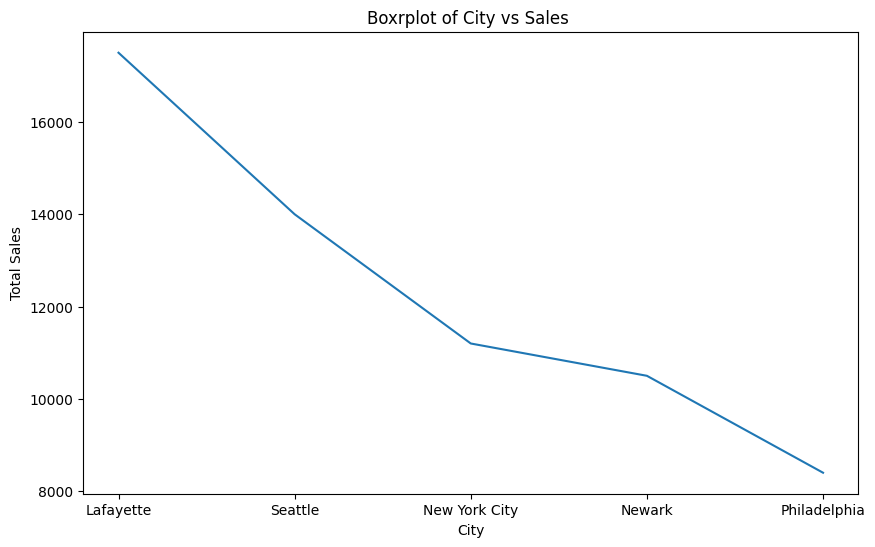

In [47]:
plt.figure(figsize=(10,6))
sns.lineplot(data=city_sales,y='Sales',x='City')
plt.title("Boxrplot of City vs Sales ") 
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

`"Canon imageCLASS 2200 Advanced Copier"` has the maximum sales in the `'Lafayette'` city

10. Which product has the highest sales in "consumer" segment

In [49]:
consumer_sales = df[df['Segment'] == 'Consumer'].groupby(['City','Product Name'])['Sales'].sum().sort_values(ascending = False).head(10).reset_index()
consumer_sales

,City,Product Name,Sales
0,Seattle,Canon imageCLASS 2200 Advanced Copier,13999.960
1,Newark,Canon imageCLASS 2200 Advanced Copier,10499.970
2,Detroit,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
3,Minneapolis,Ibico EPK-21 Electric Binding System,9449.950
4,Arlington,HP Designjet T520 Inkjet Large Format Printer ...,8749.950
5,Philadelphia,Canon imageCLASS 2200 Advanced Copier,8399.976
6,San Francisco,High Speed Automatic Electric Letter Opener,8187.650
7,San Antonio,Lexmark MX611dhe Monochrome Laser Printer,8159.952
8,New York City,HP Designjet T520 Inkjet Large Format Printer ...,6999.960
9,Atlanta,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950


In the `'Seattle'` City, the `'Canon imageCLASS 2200 Advanced Copier'` is the top-selling product in the Consumer segment.

## 7.0 Observation

highest sale product 'Canon imageCLASS 2200 Advanced Copier'\
highest sale product in 'new york' city 'Canon imageCLASS 2200 Advanced Copier'\
highest sale segment 'consumer' in every city\
highest sale product in 'consumer' segment 'Canon imageCLASS 2200 Advanced Copier' belongs to 'seattle' city\
highest sale product in 'consumer' segment 'HP Designjet T520 Inkjet Large Format Printer ...' in new york city\
highest 'Canon imageCLASS 2200 Advanced Copier' product sales in city 'Lafayette'\
The highest 'Canon imageCLASS 2200 Advanced Copier' product discount is only 20%

# 8.0 data Relation

In [50]:
df.head()

,Order ID,Order Date,Ship Date,Delivery Duration,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Discount Value,Profit,COGS,Sales_log,Profit_log
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.000000,41.9136,-220.046400,5.572002,3.759189
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.000000,219.5820,-512.358000,6.597064,5.396270
2,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.000000,6.8714,-7.748600,2.748552,2.063236
3,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-430.909875,-383.0310,-909.698625,6.865450,NaN
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,-4.473600,2.5164,-15.378000,3.151368,1.257438


<Axes: >

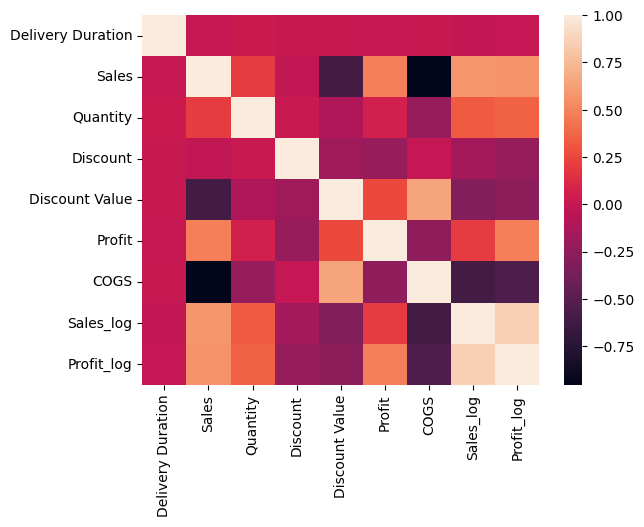

In [51]:
df_num = df.select_dtypes(['int','float'])
heat_map = df_num.corr()
sns.heatmap(heat_map)

1. Relation between Discount and Profit

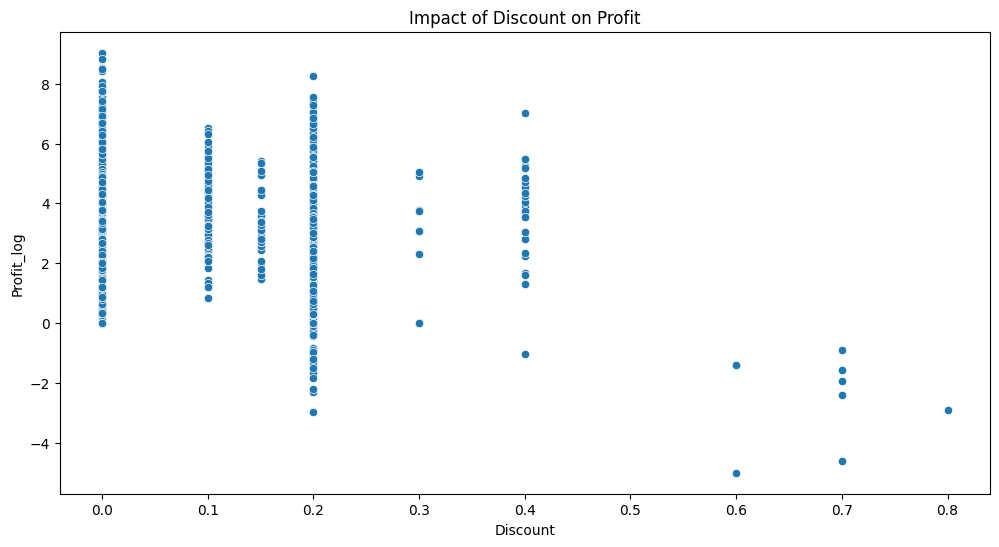

In [52]:
# Create a boxplot to see the distribution of Profit at different Discount levels
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Discount', y='Profit_log')
plt.title('Impact of Discount on Profit')
plt.show()

The above graph shows that there is a negative correlation between discount and profit and according to above figure `0 to 20%` discount have more no.of profit

2. Relation between COGS and Profit

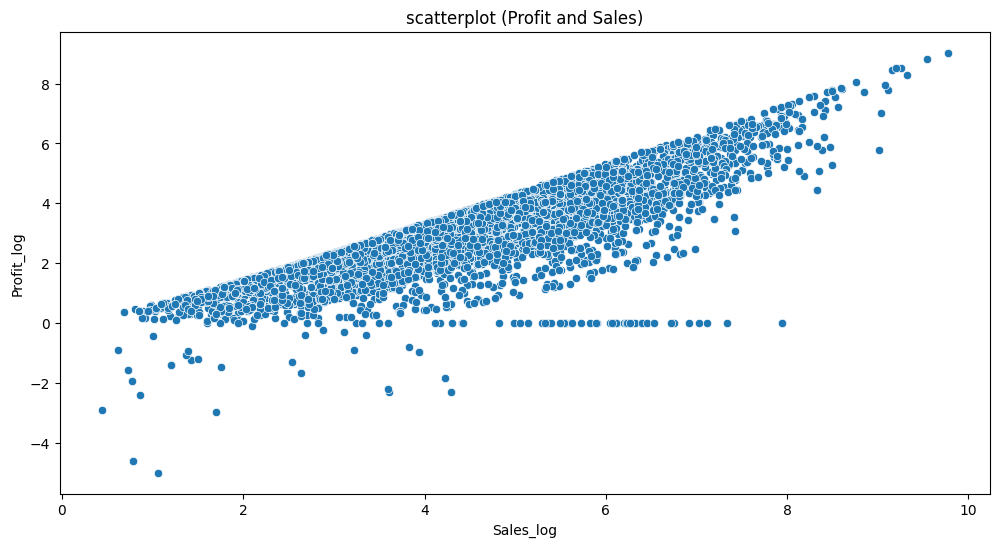

In [50]:
plt.figure(figsize=(12,6))
plt.title('scatterplot (Sales and Profit)')
sns.scatterplot(df, x='Sales_log',y='Profit_log')
plt.savefig('barplot_profit_and_sales.png', dpi=300, bbox_inches='tight')
plt.show()

3. Relation between COGS and Profit

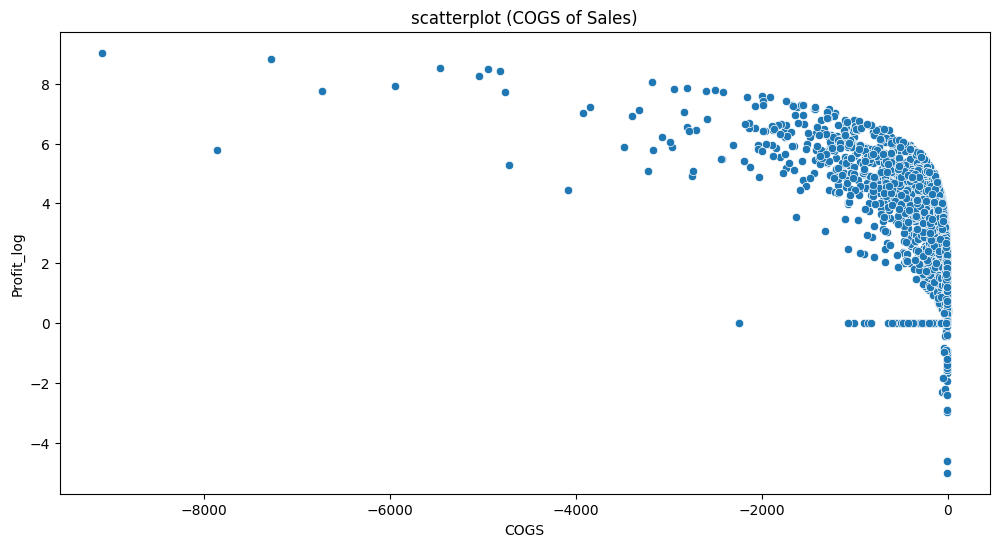

In [49]:
plt.figure(figsize=(12,6))
plt.title('scatterplot (COGS of Sales)')
sns.scatterplot(df, x='COGS',y='Profit_log')
plt.show()

It shows the negative correlation between Profit and COGS which means that if the Product cost is more there is a less profit

Recommendation and Next Steps

My recommendation is that for a small product do not keep discount and for large product keep discount ranges between `0 to 20%` and don't spend more money on COGS focus on `consumer` Segment.